___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-32-9294-9_28/MediaObjects/483279_1_En_28_Fig1_HTML.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-32-9294-9_28/MediaObjects/483279_1_En_28_Fig1_HTML.png</p>

### <font color= #2E9AFE> Tema: Regresión Logística</font>

La regresión logística es un algoritmo de machine learning para clasificación que es usado para predecir la probabilidad de variables dependientes categóricas. 

En la regresión logística la variable dependiente es una variable binaria que contiene como 1 (sí, ganar, etc) o 0 (no, perder, etc). 

La regresión logística es también conocida como la "Regresión logística binomial", la cual es basada en la función sigmoidal donde la salida es la probabilidad y la entrada puede ir desde -infinito a +infinito. 

**Supuestos de regresión logística**

- La regresión logística binaria requiere que la variable dependiente sea binaria.
- Para una regresión binaria, el nivel de factor 1 de la variable dependiente debe representar el resultado deseado.
- Solo deben incluirse las variables significativas.
- Las variables independientes deben ser independientes entre sí. Es decir, el modelo debe tener poca o ninguna multicolinealidad.
- Las variables independientes están relacionadas linealmente con las probabilidades logarítmicas.
- La regresión logística requiere tamaños de muestra bastante grandes.

**¿Puede ser utilizada en problemas multiclase?**

Sí... utiliza el método de One vs Rest (One vs all)
Donde hace problemas binarios para cada combinación de clases y predice la clase con la probabilidad más alta. 


### En otro tema... lidiar con clases imbalanceadas en el target

**¿Cómo saber cuándo hay que balancear las clases?**

1. Imbalanceo severo. Cuando una clase es significativamente más frecuente (Ej. 90% vs 10% o peor). 
2. Importancia del problema a resolver. Si la clase minoritaria representa un resultado crítico (ej. detectar fraudes, diagnósticos médicos, fallas, etc.), balancear clases se vuelve necesario para evitar fallar en predicciones importantes. 

**¿Cuándo evitar el balanceo de clases?**
1. Balanceo no tan severo. Si el imbalanceo es menor (ej. 60% vs 40%), balancear puede que no sea tan necesario y hasta puede ser perjudicial ya que puede llevar al overfitting. 



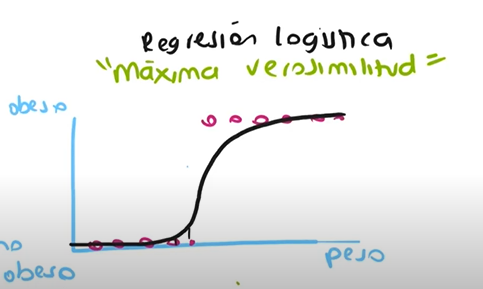

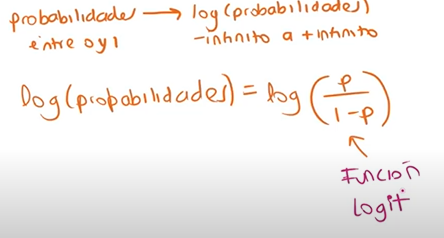

DE LOG-PROBABILIDADES A PROBABILIDADES:

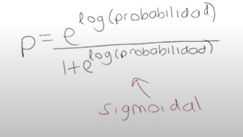 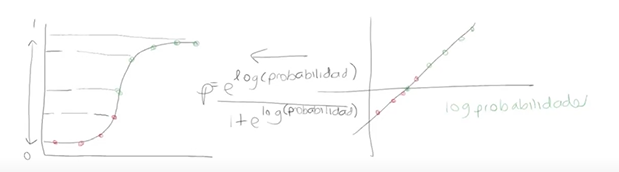 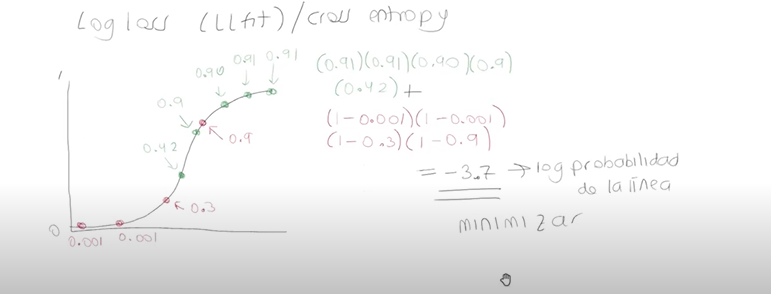

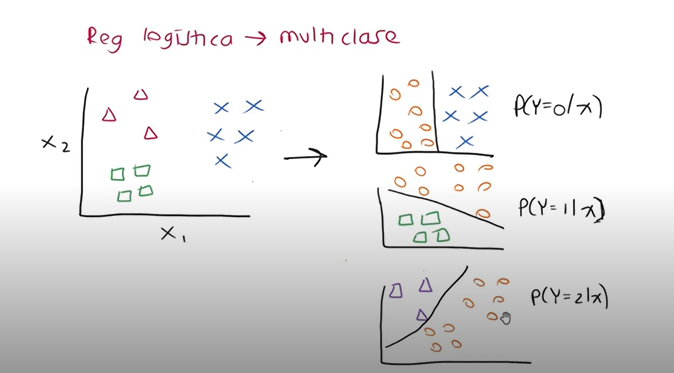

**Ejercicio**

Se tienen datos de campañas de marketing (llamadas telefónicas) de un banco portugués. Se tiene la necesidad de predecir si un cliente va a suscribirse a un depósito a término (variable a predecir). 

Un depósito a término es un depósito que un banco ofrece con una tasa fija en la cual el dinero se regresará en cierto tiempo de madurez. 


### Los datos

Los datos se obtuvieron del repositorio de UCI Machine learning https://archive.ics.uci.edu/ml/datasets/bank+marketing
Consiste de 41188 datos. 


Variables de entrada:

- age (numerica)
- job : tipo de trabajo (categorica: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : estado marital (categorica: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorica: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- housing: tiene hipoteca? (categorica: 'no','yes','unknown')
- loan: tiene préstamos personales? (categorica: 'no','yes','unknown')
- contact: tipo de comunicación (categorical: 'cellular','telephone')
- month:último mes de contacto del año (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: último día de contacto de la semana (categorical: 'mon','tue','wed','thu','fri')
- duration: duración en segundos de la llamada. 
- campaign: número de llamadas realizadas durante esta campaña y para este cliente (numeric, includes last contact)
- pdays: número de días que pasaron después de que el cliente fue contactado de la campaña anterior (numeric; 999 means client was not previously contacted)
- previous: número de contactos realizados antes de esta campaña y para este cliente (numeric)
- poutcome: resultado de la campaña de marketing anterior (categorical: 'failure','nonexistent','success')
- emp.var.rate: tasa de variación del empleo - indicador trimestral (numeric)
- cons.price.idx: índice de precios al consumidor - indicador mensual  (numeric)
- cons.conf.idx: índice de confianza del consumidor - indicador mensual (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)


Variable de salida:
- y - se suscribió el cliente a un depósito a término? (binario: 'yes','no')

In [30]:
#Importar librerías
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [31]:
#importar datos
data = pd.read_csv('bank_full.csv')
#Quitar valores nulos
data = data.dropna()
print(data.shape)

(41188, 21)


In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Exploración de datos

In [33]:
#cómo se ve la distribución de nuestra variable de salida
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [34]:
4640/(4640+36548)

0.11265417111780131

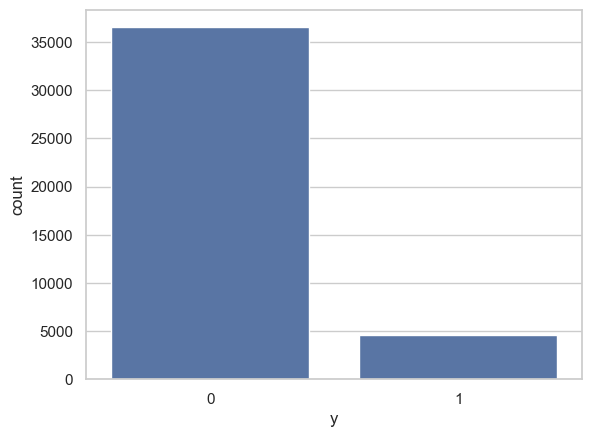

In [35]:
#graficando la distribucion de la variable a predecir
sns.countplot(x='y', data=data)
plt.show()


Los datos de salida están imbalanceados

Vamos a ver la distribución de las variables contra la variable de salida "Y" para empezar a ver qué variables podemos quitar o dejar

Text(0, 0.5, 'Proporcion de clientes')

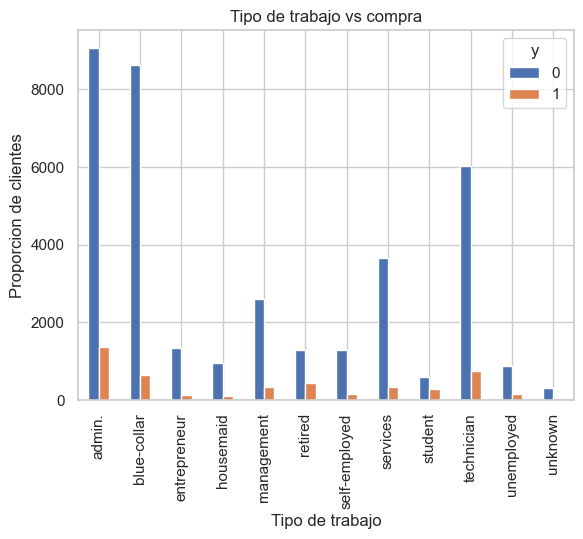

In [36]:
#Analizar variable Y vs tipo de trabajo
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Tipo de trabajo vs compra')
plt.xlabel('Tipo de trabajo')
plt.ylabel('Proporcion de clientes')

Text(0, 0.5, 'Proporcion de clientes')

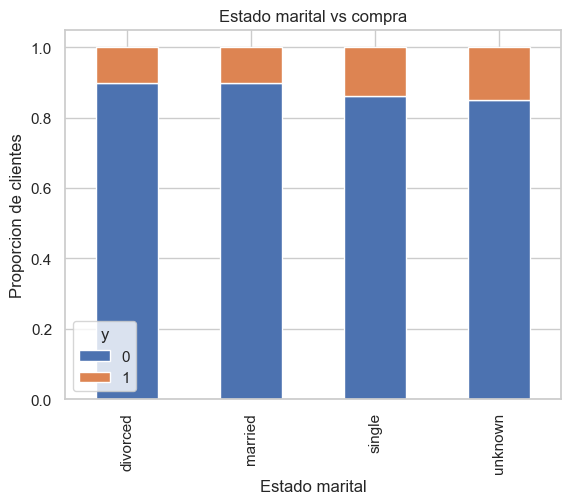

In [37]:
#Analizar variable Y vs estatus marital
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Estado marital vs compra')
plt.xlabel('Estado marital')
plt.ylabel('Proporcion de clientes')

El estado marital no parece ser un predictor bueno para predecir la compra

Text(0, 0.5, 'Proporcion de clientes')

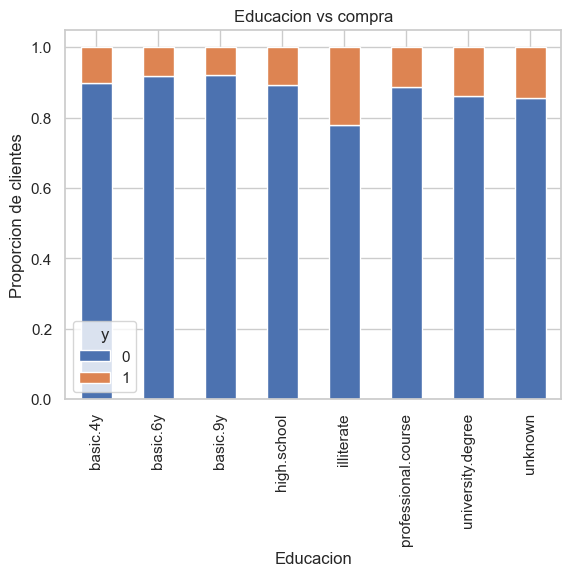

In [38]:
#Analizar variable Y vs educación
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Educacion vs compra')
plt.xlabel('Educacion')
plt.ylabel('Proporcion de clientes')

La educación parece ser un buen predictor para la variable a predecir

Text(0, 0.5, 'Proporcion de clientes')

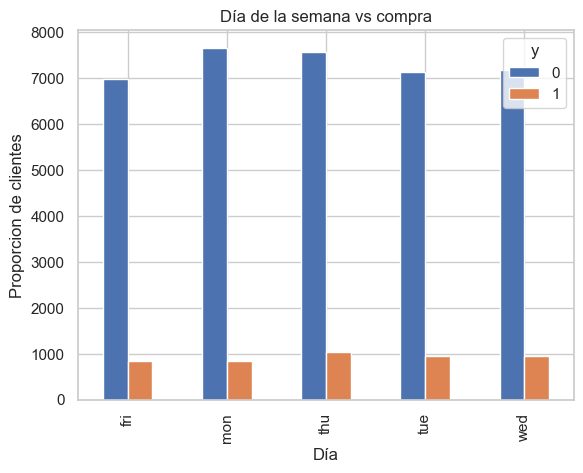

In [39]:
#Analizar variable Y vs día de la semana
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Día de la semana vs compra')
plt.xlabel('Día')
plt.ylabel('Proporcion de clientes')

El día de la semana puede no ser muy buen predictor

Text(0, 0.5, 'Proporcion de clientes')

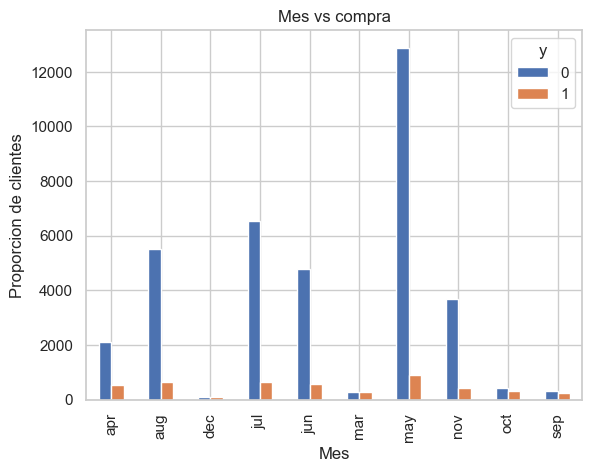

In [40]:
#Analizar variable Y vs mes
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Mes vs compra')
plt.xlabel('Mes')
plt.ylabel('Proporcion de clientes')

El mes puede ser un buen predictor

Text(0, 0.5, 'Frecuencia')

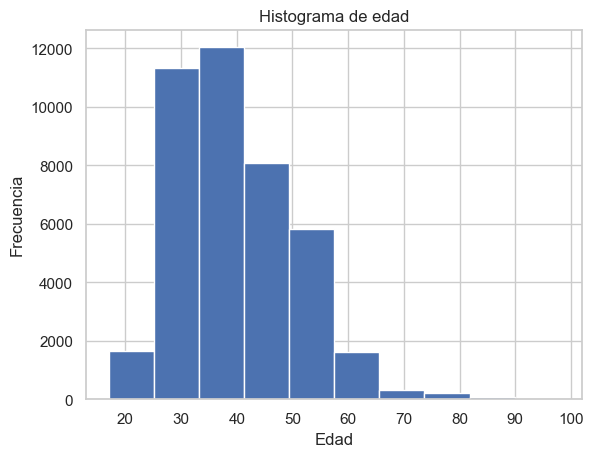

In [41]:
#distribución de las edades
data.age.hist()
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

La mayoría de los clientes del banco están entre los 30-40 años

In [42]:
#Dividir X de Y
X = data.loc[:,data.columns!='y']
y = data.loc[:,data.columns=='y']

In [43]:
#Dividir en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
columns = X_train.columns

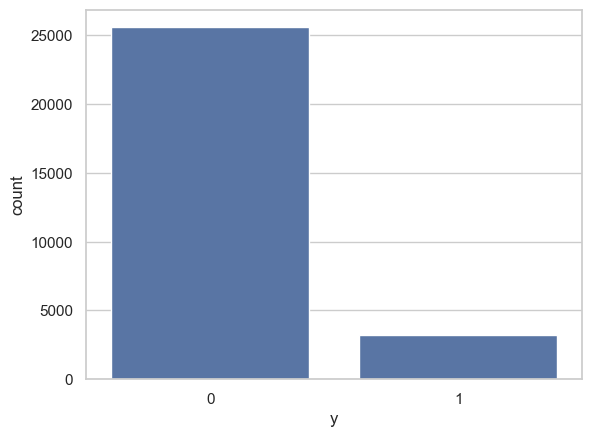

In [44]:
sns.countplot(x='y', data=y_train)
plt.show()

### Limpieza de datos


**Limpiar variables categóricas**

Vamos a usar one-hot encoding para convertir variables categóricas a numéricas

In [45]:
#Separamos las variables numericas de las categoricas
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print("Variables numericas:", numeric_features)
print("Variables categoricas:",category_features)

Variables numericas: ['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed']
Variables categoricas: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [46]:
#Se crean dos pipelines: uno para transformar las variables numéricas y otro para las categóricas.

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Se combina ambos transformadores (numérico y categórico) en un solo preprocesador que puede aplicarse a los datos para procesar todas las variables en conjunto.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [47]:
#Aunque OneHotEncoder ya realiza la codificación de variables categóricas, la función dummify tiene dos propósitos:
#1. Obtener los Nombres de las Columnas Generadas
# 2. Convertir el Array Transformado en un DataFrame

def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(category_features.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames 
    
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return transformed_array, df

In [48]:
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
27598,1.049956,-0.366548,0.154998,0.193254,-0.347043,0.836619,-0.228638,0.950784,0.774599,0.843340,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31026,0.282667,-0.809931,-0.209678,0.193254,1.679201,-1.200838,-0.867478,-1.427098,-1.280646,-0.942835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24524,-0.868267,-0.603797,0.154998,0.193254,-0.347043,0.836619,1.538990,-0.281391,0.769408,0.843340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3744,-0.676445,-0.479338,0.154998,0.193254,-0.347043,0.645608,0.723561,0.885932,0.710571,0.329642,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21460,-1.443734,-0.926611,9.636559,0.193254,-0.347043,0.836619,0.591985,-0.475945,0.774599,0.843340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


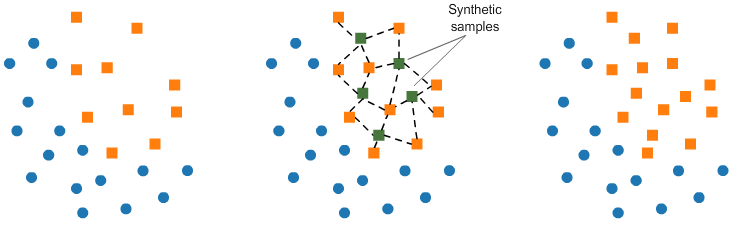

In [49]:
#Sobremuestreo Synthetic Minority Oversampling Technique (SMOTE)
from IPython.display import Image
Image(filename='SMOTE.png')

Recordar que el balanceo de clases es después de dividir los datos en train/test

In [50]:
#pip install scikit-learn==1.2.0

In [51]:
#SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#Hacer oversampling en datos del train
os_data_X, os_data_y=os.fit_resample(X_train_t, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train_t.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])



Con esto ya los datos están balanceados. Si se fijan sólo hicimos el oversampling en los datos de entrenamiento, ninguna de la información de los datos de test fueron usados para crear muestras sintéticas, por lo tanto ninguna información del test se filtra al entrenamiento del modelo. 

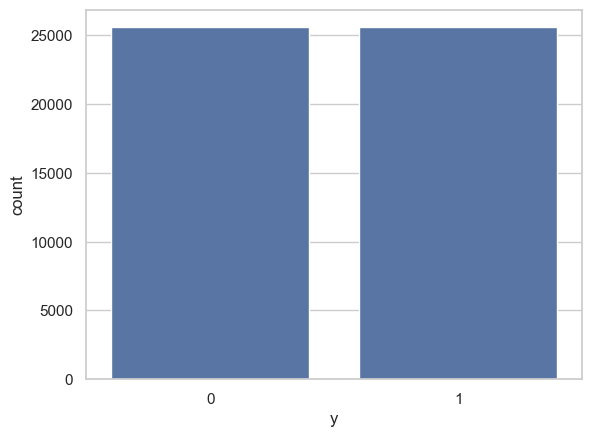

In [52]:
sns.countplot(x='y', data=os_data_y)
plt.show()


#### Selección de variables

Usamos el algoritmo de Recursive Feature Elimination (RFE) para seleccionar variables considerando cada vez menos y menos conjuntos de variables. 

RFE es fácil de configurar y bastante eficaz a la hora de seleccionar funciones en un conjunto de datos de entrenamiento.

In [53]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#crear modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=2000)

#crear el recursive feature elimination para la regresión logística
rfe = RFE(model, n_features_to_select=20, verbose=0) #vamos a dejar sólo 20 variables
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print("Características seleccionadas: %s" % rfe.support_)
print("Rank de las características: %s" % rfe.ranking_)

Características seleccionadas: [False  True False False False  True  True False  True  True False False
 False False False  True False False False False False  True False False
 False  True False False False False  True False False False False  True
 False False False False False False False False  True False  True False
 False  True  True  True  True  True  True False False False False False
  True False  True]
Rank de las características: [36  1 19 31 40  1  1 26  1  1 39 17 11 37 20  1 12 18  8 38 33  1 23 22
 21  1  7  3  4  6  1 10 27  9 44  1 41 34  5 35 43 15 16 25  1 14  1 32
 13  1  1  1  1  1  1 28 30 24 29 42  1  2  1]


In [54]:
X_train_columns = X_train_t.columns
selected_columns = X_train_columns[rfe.support_]
print(selected_columns.tolist())

['duration', 'emp_var_rate', 'cons_price_idx', 'euribor3m', 'nr_employed', 'job_retired', 'job_unknown', 'marital_unknown', 'education_illiterate', 'default_unknown', 'contact_telephone', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_success']


In [55]:
X_train_final = os_data_X[selected_columns.tolist()]
y_train_final = os_data_y['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,duration,emp_var_rate,cons_price_idx,euribor3m,nr_employed,job_retired,job_unknown,marital_unknown,education_illiterate,default_unknown,contact_telephone,month_aug,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success
39935,-0.456002,-0.118439,-0.651069,0.260067,0.396104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30199,-0.798263,-0.118439,-0.651069,0.228341,0.396104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17755,-0.199307,0.836619,0.591985,0.768831,0.843340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,-0.522121,-1.901215,-1.916629,-1.497534,-1.259916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21784,-0.615465,0.645608,0.723561,0.709418,0.329642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#pip install stastmodels

In [57]:
#Implementar modelo

# statsmodels es un paquete que proporciona funciones para la estimación de muchos modelos estadísticos,
#así como para realizar pruebas estadísticas y exploración de datos estadísticos.
import statsmodels.api as sm
logit_model=sm.Logit(y_train_final,X_train_final)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.323508
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.533     
Date:                 2024-11-12 02:38  AIC:               33145.1747
No. Observations:     51166             BIC:               33322.0313
Df Model:             19                Log-Likelihood:    -16553.   
Df Residuals:         51146             LL-Null:           -35466.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
duration              1.8052   0.0185  97.7324 0.0000  1.7690  1.8414
emp_var_rate    

In [58]:
X_train_final

,duration,emp_var_rate,cons_price_idx,euribor3m,nr_employed,job_retired,job_unknown,marital_unknown,education_illiterate,default_unknown,contact_telephone,month_aug,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success
0,-0.366548,0.836619,-0.228638,0.774599,0.843340,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,-0.809931,-1.200838,-0.867478,-1.280646,-0.942835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
2,-0.603797,0.836619,1.538990,0.769408,0.843340,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,-0.479338,0.645608,0.723561,0.710571,0.329642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
4,-0.926611,0.836619,0.591985,0.774599,0.843340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51161,1.315740,-2.219567,-2.072443,-1.629821,-2.072695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0
51162,4.905546,0.645608,0.723561,0.710248,0.329642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
51163,2.266057,-1.200838,-0.941554,-1.305211,-0.942835,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.235093,0.0,0.0,0.0,0.0,1.0
51164,-0.157170,-1.901215,-1.061380,-1.351038,-1.259916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0


p value > 0.05, significa que podemos quitar la variable

Los p-values para la mayoría de las variables son menores a 0.05, excepto por 1 variable, por lo tanto la vamos a quitar. 

In [60]:
cols=['duration', 'emp_var_rate', 'cons_price_idx', 'euribor3m',
       'job_retired', 'job_unknown', 'marital_unknown',
       'education_illiterate', 'default_unknown', 'contact_telephone', 'month_aug',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_failure', 'poutcome_success']
logit_model=sm.Logit(y_train_final,X_train_final[cols])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.323948
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.533     
Date:                 2024-11-12 02:39  AIC:               33186.2082
No. Observations:     51166             BIC:               33345.3792
Df Model:             17                Log-Likelihood:    -16575.   
Df Residuals:         51148             LL-Null:           -35466.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
duration              1.8019   0.0185  97.5553 0.0000  1.7657  1.8381
emp_var_rate    

Una vez que terminamos de seleccionar variables, creamos el modelo de regresión logística. 

Pero antes... ¿Cómo interpretar estos coeficientes?

- Para las variables numéricas que se les aplicó escalamiento: los coeficientes representan el efecto de un aumento de una desviación estándar en la variable sobre las probabilidades logarítmicas de la variable objetivo.
 
Ejemplo: Para la variable de "duration". Un coeficiente de 1.83 significa que si la duración de la llamada aumenta en una desviación estándar por encima del promedio, las probabilidades de que el cliente acepte la oferta aumentan por un factor de 6.23.

- Para las variables categóricas que se les aplicó el one-hot encoding: Los coeficientes de estas características binarias representan el cambio en las probabilidades logarítmicas de la variable objetivo al pasar de la categoría de referencia a la categoría representada por la característica.

Ejemplo: Para la variable categórica "month_nov". El coeficiente negativo (-1.4411) indica que estar en noviembre disminuye significativamente las probabilidades de que los clientes acepten la oferta.
Específicamente, estar en noviembre reduce las odds de aceptar la oferta a aproximadamente un 23.6%.

In [61]:
#Regresión logítica con sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Inicializar objeto
logreg = LogisticRegression()
#Ajustar modelo a datos de entrenamiento
logreg.fit(X_train_final[cols], y_train_final)

LogisticRegression()

In [62]:
#Predecir con datos del test
y_pred = logreg.predict(X_test_t[cols])


Para clasificación usamos otras métricas diferentes a las de regresión

In [63]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9388 1577]
 [ 164 1228]]


El resultado nos dice que tenemos 9390+1226=10616 predicciones correctas y 1575+166=1741 predicciones incorrectas 

In [64]:
#Calcular Accuracy
print('Accuracy de la regresión logística en los datos de test: {:.4f}'.format(logreg.score(X_test_t[cols], y_test)))

Accuracy de la regresión logística en los datos de test: 0.8591


In [65]:
(9390+1226)/(9390+1226+166+1575)

0.8591081977826334

**Ventajas de la regresión logística**

- Fácil de implementar, interpretar y muy eficiente de entrenar
- No sólo provee la medida de la importancia (tamaño) del coeficiente, sino que también nos dice la dirección de la asociación (positiva/negativa).
- Es muy rápida clasificando datos nuevos
- Tiene buena precisión para datos simples y funciona bien cuando los datos son linealmente separables
- Se pueden interpretar los coeficientes del modelo como indicadores de importancia de variables
- La regresión logística hace poco sobre-ajuste cuando los datos son simples pero puede sobre-ajustar cuando tenemos datos de alta dimensionalidad. 

**Desventajas de la regresión logística**
- Si el número de observaciones (filas) es menor que el número de variables (columnas) la regresión logística no se debe usar, sino lo que puede pasar es que sobre ajuste
- La mayor limitación de la regresión logística es que asume una relación lineal entre variables dependientes y variables independientes. 
- No es un buen modelo si no tenemos datos linealmente separables. 
- Es difícil obtener resultados cuando tenemos relaciones de datos complejos, las redes neuronales pueden mejorar mucho este algoritmo